## Import ML Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Import ML Algorithms

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from scipy                   import stats

## Import Other Libraries

In [100]:
import os
import math
import statistics

## Set Styles of Libraries

#### Seaborn

In [95]:
sns.set_style( 'darkgrid' )

## Load Data

In [6]:
data_files_path = os.path.join( os.getcwd() + '', '..', '..', '..', 'data', '' )
data_files      = os.listdir( data_files_path )
df              = []

In [7]:
for csv_file in data_files:
    if csv_file != '.ipynb_checkpoints':
        df.append( pd.read_csv( '../../../data/' + csv_file ) )

In [8]:
df[0].shape[0] / df[1].shape[0] 

0.434942385437622

It seems that approximately $44\%$ of the data is test data. I would prefer to have about $33\%$ of the data to be training data.

In [9]:
full_df = None

for table in df:
    full_df = pd.concat( [ full_df, table ], sort = False )

## Functions

In [227]:
def winsor( X_j ):
    std_cutoff         = np.mean( X_j ) + ( 3 * np.std( X_j ) )
    sort_X_j           = X_j.sort_values( ascending = False )
    count_over_3_std   = len( sort_X_j[ sort_X_j > std_cutoff ] )
    perc_outside_3_std = count_over_3_std / len( X_j )
    win_X_j            = stats.mstats.winsorize( X_j, limits = [0, perc_outside_3_std] )
    
    return win_X_j

## Transform Test Data

- Winsorize `DBNOs`
- Factor `assists`

## Prepare Data

In [10]:
pd.set_option( 'display.max_columns', None )

In [11]:
full_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0,NaN
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0,NaN
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0,NaN
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0,NaN
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0,NaN


In [12]:
print( len( full_df.columns ) )
print( '\n' )
print( full_df.columns )

29


Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')


#### Columns

- `assists`: Number of enemy players this player damaged that were killed by teammates.
- `boosts`: Number of boost items used.
- `damageDealt`: Total damage dealt. Note: Self inflicted damage is subtracted.
- `DBNOs`: Number of enemy players knocked.
- `headshotKills`: Number of enemy players killed with headshots.
- `heals`: Number of healing items used.
- `Id`: Player’s Id
- `killPlace`: Ranking in match of number of enemy players killed.
- `killPoints`: Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- `killStreaks`: Max number of enemy players killed in a short amount of time.
- `kills`: Number of enemy players killed.
- `longestKill`: Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- `matchDuration`: Duration of match in seconds.
- `matchId`: ID to identify match. There are no matches that are in both the training and testing set.
- `matchType`: String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- `rankPoints`: Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- `revives`: Number of times this player revived teammates.
- `rideDistance`: Total distance traveled in vehicles measured in meters.
- `roadKills`: Number of kills while in a vehicle.
- `swimDistance`: Total distance traveled by swimming measured in meters.
- `teamKills`: Number of times this player killed a teammate.
- `vehicleDestroys`: Number of vehicles destroyed.
- `walkDistance`: Total distance traveled on foot measured in meters.
- `weaponsAcquired`: Number of weapons picked up.
- `winPoints`: Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- `groupId`: ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- `numGroups`: Number of groups we have data for in the match.
- `maxPlace`: Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- `winPlacePerc`: The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

#### Check Missing Values

In [27]:
full_df.drop('winPlacePerc', axis = 1).columns[ full_df.drop('winPlacePerc', axis = 1).isnull().any() ]

Index([], dtype='object')

Seems there are no missing values.

#### Partition Data

In [28]:
X = full_df.drop( 'winPlacePerc', axis = 1 )
y = full_df[ 'winPlacePerc' ]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 19920917 )

#### Clean Data

###### DBNOs

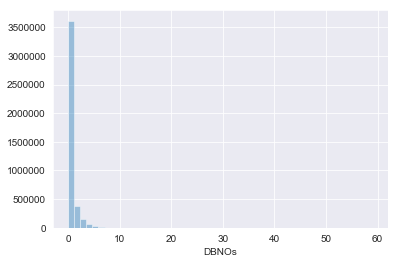

In [98]:
sns.distplot( X_train['DBNOs'], kde = False )

It seems that the feature DBNOs has an aggressive positive skew. Due to this I will transform this feature via Winsorization.

In [76]:
len( X_train[ X_train['DBNOs'] > 0 ] ) / len( X_train )

0.37592620790328213

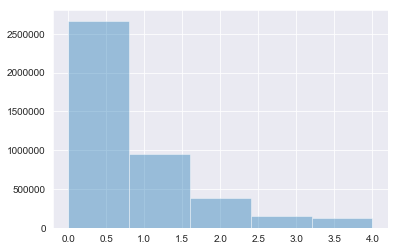

In [151]:
sns.distplot( winsor( X_train['DBNOs'] ), kde = False, bins = 5 )

In [234]:
X_train['DBNOs'] = winsor( X_train['DBNOs'] ).data

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### Assists

In [223]:
print( len( X_train[ X_train['assists'] == 0 ] ) / len( X_train ) )
print( len( X_train[ X_train['assists'] == 1 ] ) / len( X_train ) )
print( len( X_train[ X_train['assists'] == 2 ] ) / len( X_train ) )
print( len( X_train[ X_train['assists']  > 3 ] ) / len( X_train ) )

0.8251619803979218
0.13304975507342887
0.030689323924073815
0.0031854605094351054


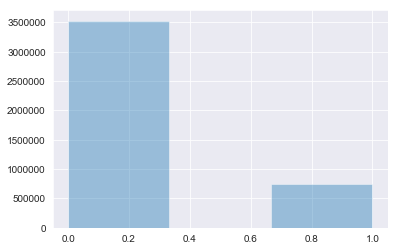

In [226]:
sns.distplot( winsor( X_train['assists'] ), kde = False, bins = 3 )

It seems that there whould only be a categorization between assists and no assists. So I will convert this feature into dummy variables.

In [240]:
had_assists        = lambda x: 0 if x == 0 else 1
X_train['assists'] = list(map( had_assists, X_train['assists'] ))

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
